# Regresión Red Simple (Perceptrón Multicapa)
## Imports Necesarios

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor

# Cargar Datos de Entrada

In [2]:
np.random.seed(1)

In [3]:
#cargamos los datos de entrada
#header=0,
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)

# Ver los 1ros registros
data.head()

,ws,wp1t-44,wp1t-43,wp1t-42,wp1t-41,wp1t-40,wp1t-39,wp1t-38,wp1t-37,wp1t-36,...,wp1t-9,wp1t-8,wp1t-7,wp1t-6,wp1t-5,wp1t-4,wp1t-3,wp1t-2,wp1t-1,wp1
52,3.17,0.035,0.005,0.000,0.000,0.010,0.025,0.03,0.01,0.00,...,0.01,0.01,0.010,0.010,0.010,0.080,0.025,0.080,0.000,0.035
53,2.88,0.005,0.000,0.000,0.010,0.025,0.030,0.01,0.00,0.01,...,0.01,0.01,0.010,0.010,0.080,0.025,0.080,0.000,0.035,0.005
54,2.46,0.000,0.000,0.010,0.025,0.030,0.010,0.00,0.01,0.00,...,0.01,0.01,0.010,0.080,0.025,0.080,0.000,0.035,0.005,0.000
55,2.01,0.000,0.010,0.025,0.030,0.010,0.000,0.01,0.00,0.00,...,0.01,0.01,0.080,0.025,0.080,0.000,0.035,0.005,0.000,0.000
56,1.67,0.010,0.025,0.030,0.010,0.000,0.010,0.00,0.00,0.00,...,0.01,0.08,0.025,0.080,0.000,0.035,0.005,0.000,0.000,0.010


# Separar Datos de Entrenamiento (Train) y Test

In [4]:
#data_train = data.sample(frac=1,random_state=200) 
#data_test = data.drop(data_train.index) 

# 75% train y 25% test
data_train, data_test = train_test_split(data, test_size=0.2, random_state=200)

dataset_train = data_train.values
x_train = dataset_train[:,0:44]
y_train = dataset_train[:,44]

dataset_test = data_test.values
x_test = dataset_test[:,0:44]
y_test = dataset_test[:,44]


In [5]:
x_train[0]

array([2.84 , 0.095, 0.115, 0.135, 0.1  , 0.09 , 0.115, 0.155, 0.085,
       0.226, 0.316, 0.195, 0.11 , 0.1  , 0.065, 0.11 , 0.201, 0.221,
       0.185, 0.195, 0.16 , 0.075, 0.085, 0.115, 0.08 , 0.03 , 0.01 ,
       0.015, 0.005, 0.   , 0.01 , 0.211, 0.241, 0.331, 0.286, 0.296,
       0.211, 0.185, 0.18 , 0.14 , 0.226, 0.316, 0.195, 0.11 ])

In [6]:
y_train[0]

0.1

## Crear Modelo, Entrenarlo y Predecir

In [16]:
neuronas = 1628

nn = MLPRegressor(
    hidden_layer_sizes=(neuronas,),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

hist=nn.fit(x_train, y_train)

#test_x = np.array(x)

y_pred_train = nn.predict(x_train)
y_pred_test = nn.predict(x_test)

Iteration 1, loss = 0.00562747
Validation score: 0.891383
Iteration 2, loss = 0.00273567
Validation score: 0.907428
Iteration 3, loss = 0.00248157
Validation score: 0.911919
Iteration 4, loss = 0.00235804
Validation score: 0.914782
Iteration 5, loss = 0.00232486
Validation score: 0.918025
Iteration 6, loss = 0.00228848
Validation score: 0.917748
Iteration 7, loss = 0.00226136
Validation score: 0.912900
Iteration 8, loss = 0.00225505
Validation score: 0.915841
Iteration 9, loss = 0.00225424
Validation score: 0.915201
Iteration 10, loss = 0.00222424
Validation score: 0.918915
Iteration 11, loss = 0.00217993
Validation score: 0.920727
Iteration 12, loss = 0.00218642
Validation score: 0.922115
Iteration 13, loss = 0.00216378
Validation score: 0.917644
Iteration 14, loss = 0.00213009
Validation score: 0.921037
Iteration 15, loss = 0.00214312
Validation score: 0.923208
Iteration 16, loss = 0.00212850
Validation score: 0.922733
Iteration 17, loss = 0.00210299
Validation score: 0.922512
Iterat

## Obtener Metricas del Modelo

In [17]:
#print('Coefficients: \n', nn.coef_)
print("Mean squared error train: %.2f" % mean_squared_error(y_train, y_pred_train))
print("Mean squared error test: %.2f" % mean_squared_error(y_test, y_pred_test))

rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE train: %.2f" % (rmse) )

#print('Score : {:.3f}'.format(nn.score(x_test, y_test)))
#print('num of layers: ', nn.n_layers_)
print('R^2: ', nn.score(x_train, y_train)) 
print('R^2 B: ', r2_score(y_train, y_pred_train)) 
print('current loss computed with the loss function: ', nn.loss_)

Mean squared error train: 0.00
Mean squared error test: 0.00
RMSE train: 0.05
R^2:  0.9547224564383746
R^2 B:  0.9547224564383746
current loss computed with the loss function:  0.0013267181486919827


## Graficar Resultados

In [18]:
#pred_train = y_predict
pred_test_plot = y_pred_test[2000:2050]
y_test_plot = y_test[2000:2050]
corr = np.corrcoef(y_test, y_pred_test)

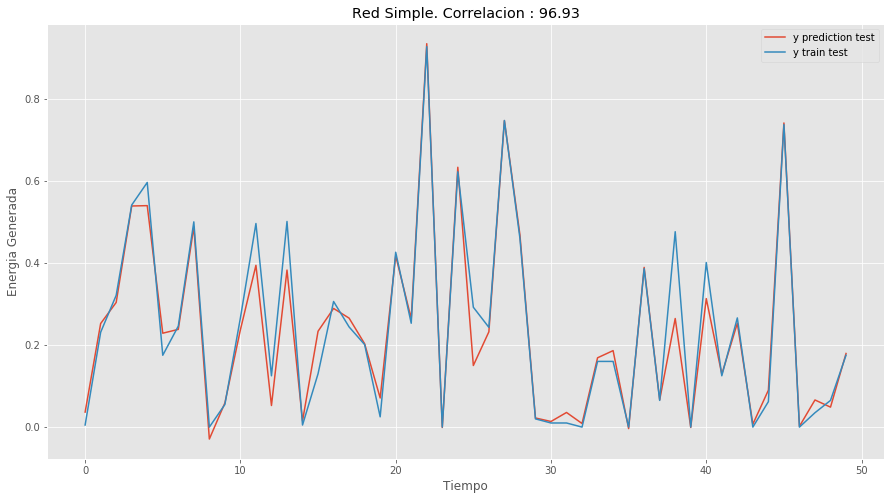

In [19]:
plt.plot(pred_test_plot, label ="y prediction test")
plt.plot(y_test_plot, label ="y train test")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("Red Simple. Correlación : %.2f" % ( corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Tiempo")
plt.legend()
plt.show()

In [20]:
    # Plot training & validation loss values
#plt.plot(nn.loss_curve_)
    #plt.plot(hist.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'])
#plt.show()

    #pd.DataFrame(model.loss_curve_).plot()

In [21]:
#pd.DataFrame(nn.loss_curve_).plot()

### Error Mínimo Cuadrdo

In [22]:
from sklearn.model_selection import learning_curve

#train_sizes = [1, 100, 500, 2000, 5000, 7654]
train_sizes = [0.05, 0.15,0.5, 0.75, 1]

train_sizes, train_scores, valid_scores = learning_curve(
                                                        MLPRegressor(hidden_layer_sizes=(neuronas,),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08
                                                                     ), 
                                                        x_train, 
                                                        y_train, 
                                                        train_sizes=train_sizes, 
                                                        cv=5,
                                                        random_state=0,
                                                        scoring = 'neg_mean_squared_error')

In [23]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -valid_scores.mean(axis = 1)

#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

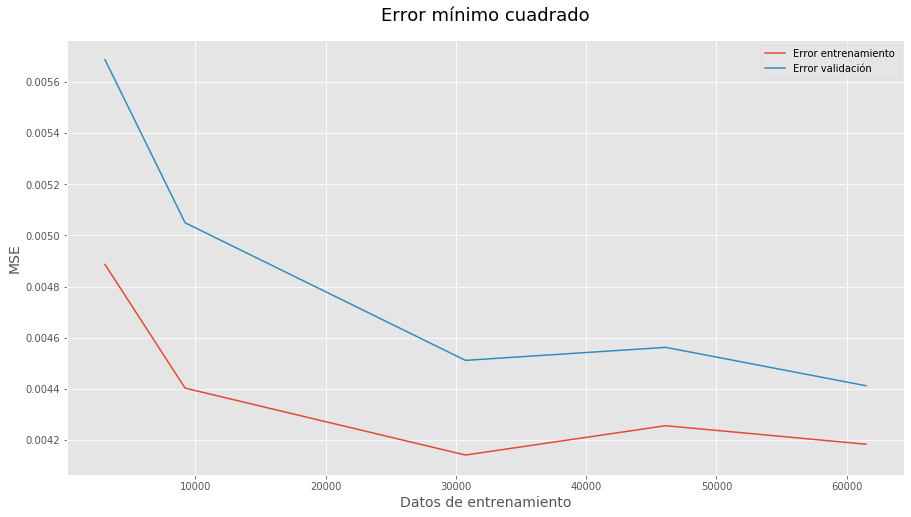

In [30]:
#plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Error entrenamiento')
plt.plot(train_sizes, validation_scores_mean, label = 'Error validación')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Datos de entrenamiento', fontsize = 14)

title = 'Error mínimo cuadrado'
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()

### Función de Pérdida (Loss)

In [25]:
#train_sizes = [1, 100, 500, 2000, 5000, 7654]
train_sizes = [0.05, 0.15,0.5, 0.75, 1]

train_sizes, train_scores, valid_scores = learning_curve(
                                                        MLPRegressor(hidden_layer_sizes=(neuronas,),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08
                                                                     ), 
                                                        x_train, 
                                                        y_train, 
                                                        train_sizes=train_sizes, 
                                                        cv=5,
                                                        random_state=0,
                                                        scoring = 'neg_mean_absolute_error')

In [28]:
train_scores_mean_abs = -train_scores.mean(axis = 1)
validation_scores_mean_abs = -valid_scores.mean(axis = 1)

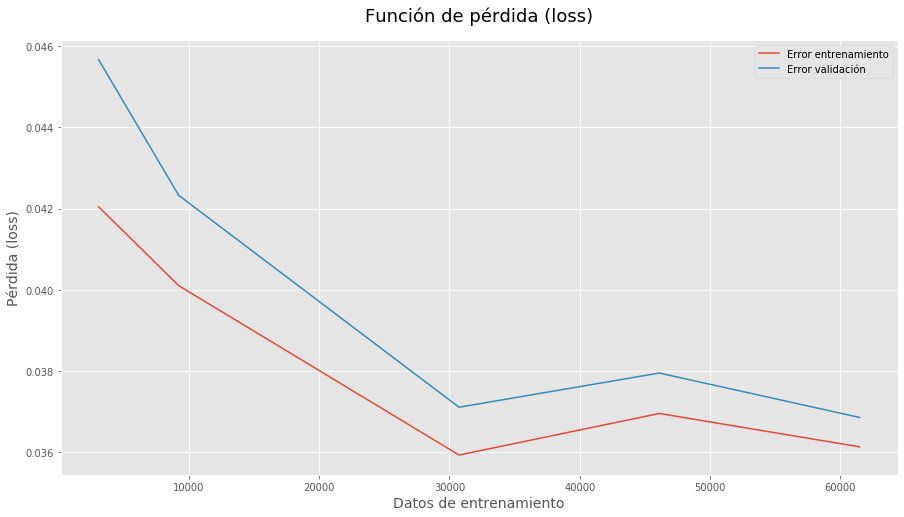

In [32]:
plt.plot(train_sizes, train_scores_mean_abs, label = 'Error entrenamiento')
plt.plot(train_sizes, validation_scores_mean_abs, label = 'Error validación')

plt.ylabel('Pérdida (loss)', fontsize = 14)
plt.xlabel('Datos de entrenamiento', fontsize = 14)

title = 'Función de pérdida (loss)'
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()

## Validation test

In [204]:

#MLPRegressor().get_params().keys()
#sorted(sklearn.metrics.SCORERS.keys())

[0.0414801  0.02984462 0.02959255 0.03424484 0.0308069  0.03075902
 0.0312092  0.03807712 0.03185098 0.02902291 0.03072645 0.02924154
 0.03473017 0.03077043 0.02931822 0.02896122 0.0293158  0.03140952
 0.03681622 0.02952147 0.03055767 0.03010072 0.0381202  0.03105191
 0.03014593]


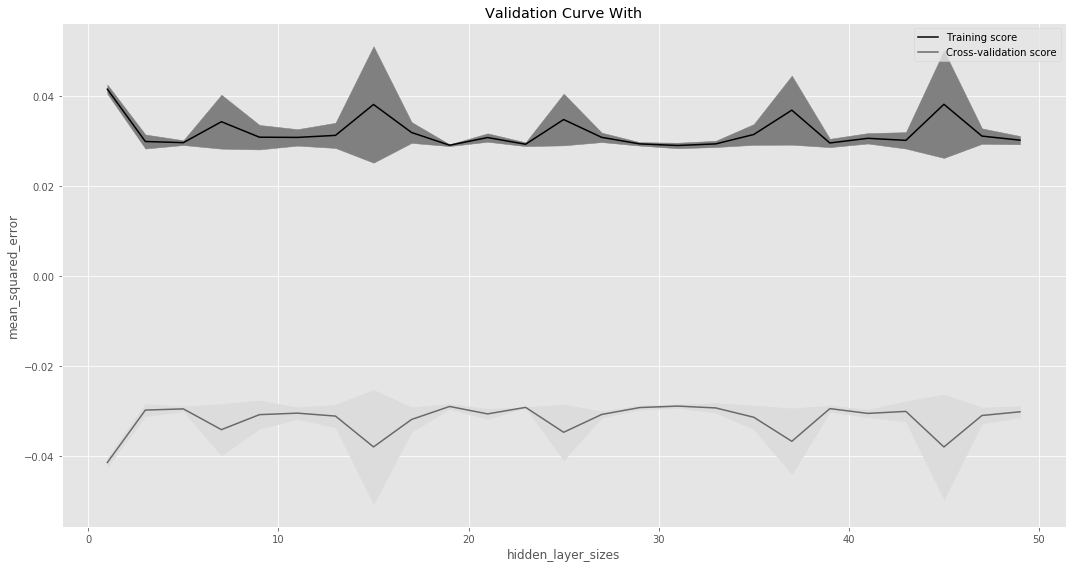

In [160]:
from sklearn.model_selection import validation_curve

# Create range of values for parameter
param_range = np.arange(1, 50, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(MLPRegressor(), 
                                             x_train, 
                                             y_train, 
                                             param_name="hidden_layer_sizes", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="neg_mean_squared_error", 
                                             n_jobs=-1)

# Calculate mean and standard deviation for training set scores
#train_mean = np.mean(train_scores, axis=1)
#train_std = np.std(train_scores, axis=1)

train_mean = -train_scores.mean(axis = 1)
train_std = -train_scores.std(axis = 1)

print (train_mean)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("mean_squared_error")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [251]:
## Vamos a comprobar:
# Quiero predecir cuántos "wp1" voy a obtener por 13 ws (wind speed mph),
# según nuestro modelo, hacemos:

y_12 = nn.predict([[3.66,106.24,2009,7]])
print(y_12)

[0.13636744]


In [252]:
#print('coefficients: ', nn.coefs_[1] )
#len(nn.coefs_[0][1])

print(nn.coefs_[1][89])

coef1 = nn.coefs_[0][0]
coef2 = nn.coefs_[0][1]
coef3 = nn.coefs_[0][2]
#coef4 = nn.coefs_[0][3]

#print( len(coef4) )

print(coef1[89])
print(coef2[89])
print(coef3[89])
#print(coef4[89])


[0.19731277]
0.22686566922004597
-0.09169792041786326
0.06543440191428704


## Guarda Datos Predicción

In [33]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_iter1_redNN.csv')

